In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Assigning variable
region = data.loc[:, 'neighbourhood_group']

# Extracting unique values from the variable
unique_regions = pd.unique(region)
print(unique_regions)

# Number of distinct regions: 5

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [6]:
# Counting unique values
unique_regions_count = data['neighbourhood_group'].value_counts().count()
print('Number of distinct regions:', unique_regions_count)

Number of distinct regions: 5


In [7]:
# Calculating the percentage of properties by region 
percent_by_region = round(data['neighbourhood_group'].value_counts(normalize=True) * 100, 2)
percent_by_region

Manhattan        44.30
Brooklyn         41.12
Queens           11.59
Bronx             2.23
Staten Island     0.76
Name: neighbourhood_group, dtype: float64

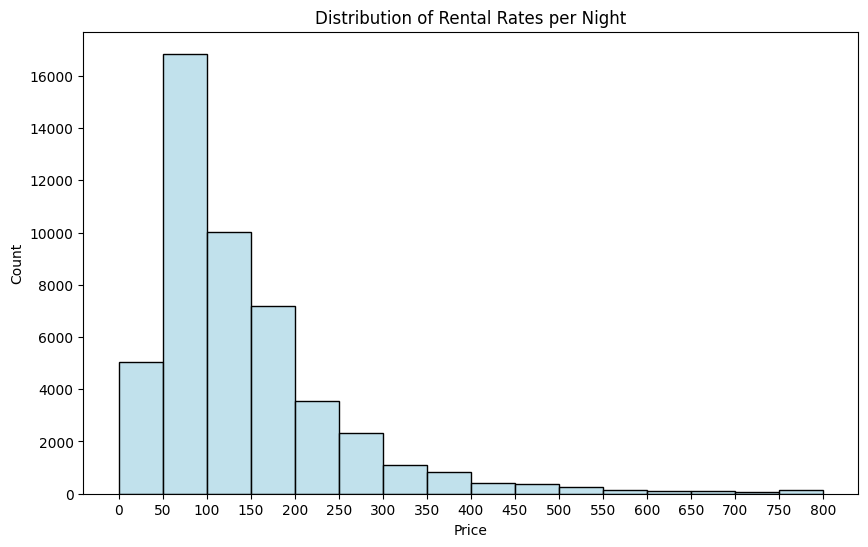

In [13]:
# Seaborn histogram with x-axis limit, binwidth of 50, and x-ticks
plt.figure(figsize=(10, 6))
sns.histplot(data[data['price'] <= 800], x='price', binwidth=50, kde=False, color='lightblue')
plt.title('Distribution of Rental Rates per Night')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xticks(np.arange(0, 801, 50))
plt.show()

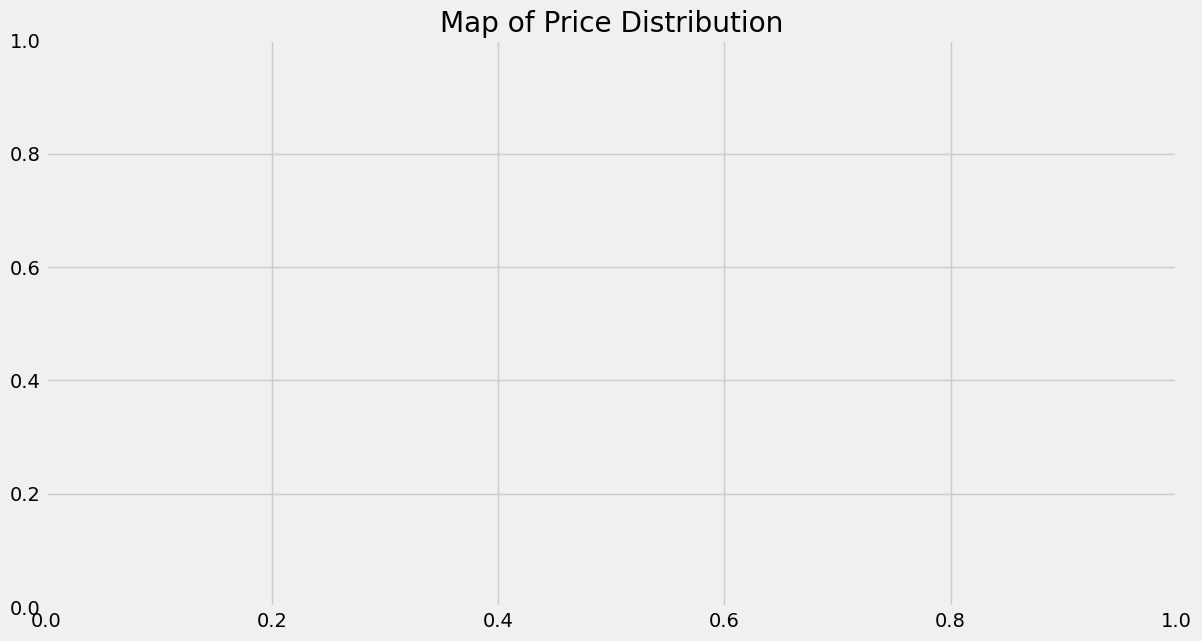

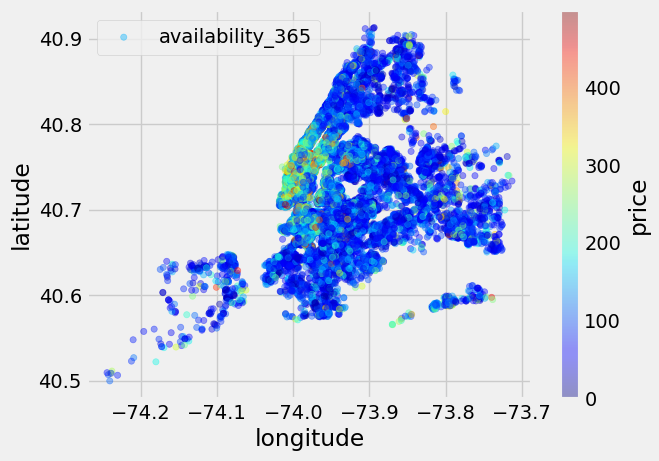

In [17]:
plt.figure(figsize=(13,7))
plt.title("Map of Price Distribution")
ax=data[data.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(nyc_df.neighbourhood_group.value_counts(), labels=nyc_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

In [35]:
!pip3 install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 215.2 kB/s eta 0:00:00a 0:00:01
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [36]:
import folium

# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=11)

# Sample a subset of the data for better visualization and performance
sample_data = data.sample(n=1000, random_state=42)

# Add the listings to the map
for idx, row in sample_data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

m


In [37]:
correlation_matrix = data.corr()

# Extract correlations with 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

price_correlation

price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
host_id                           0.015309
id                                0.010619
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64

In [58]:
correlation_matrix

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


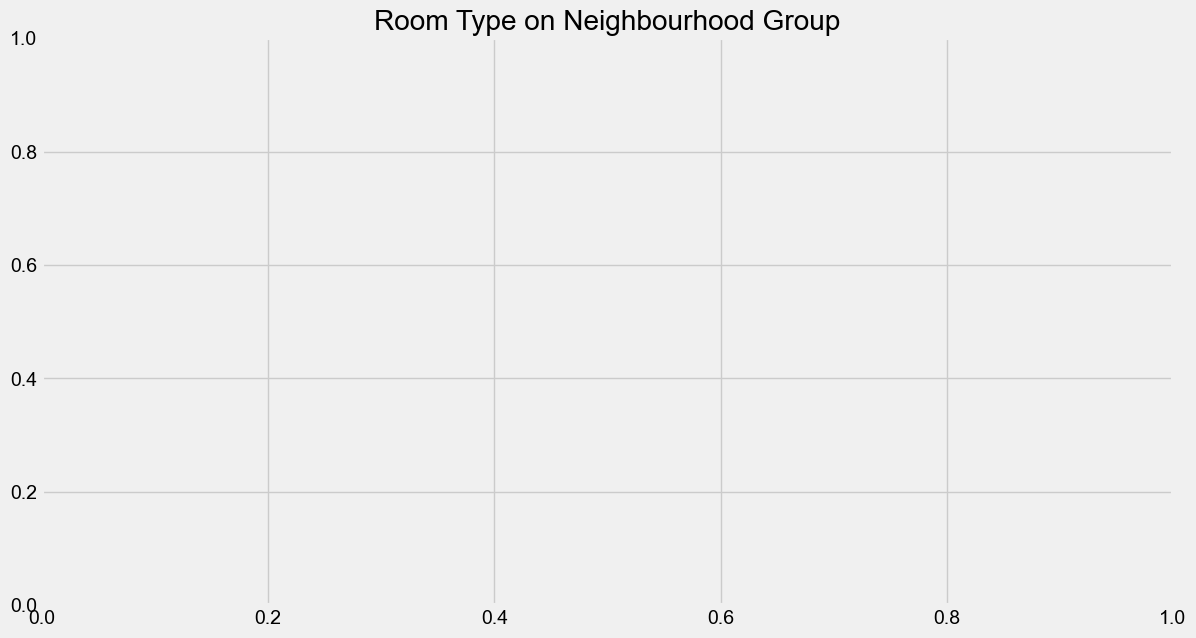

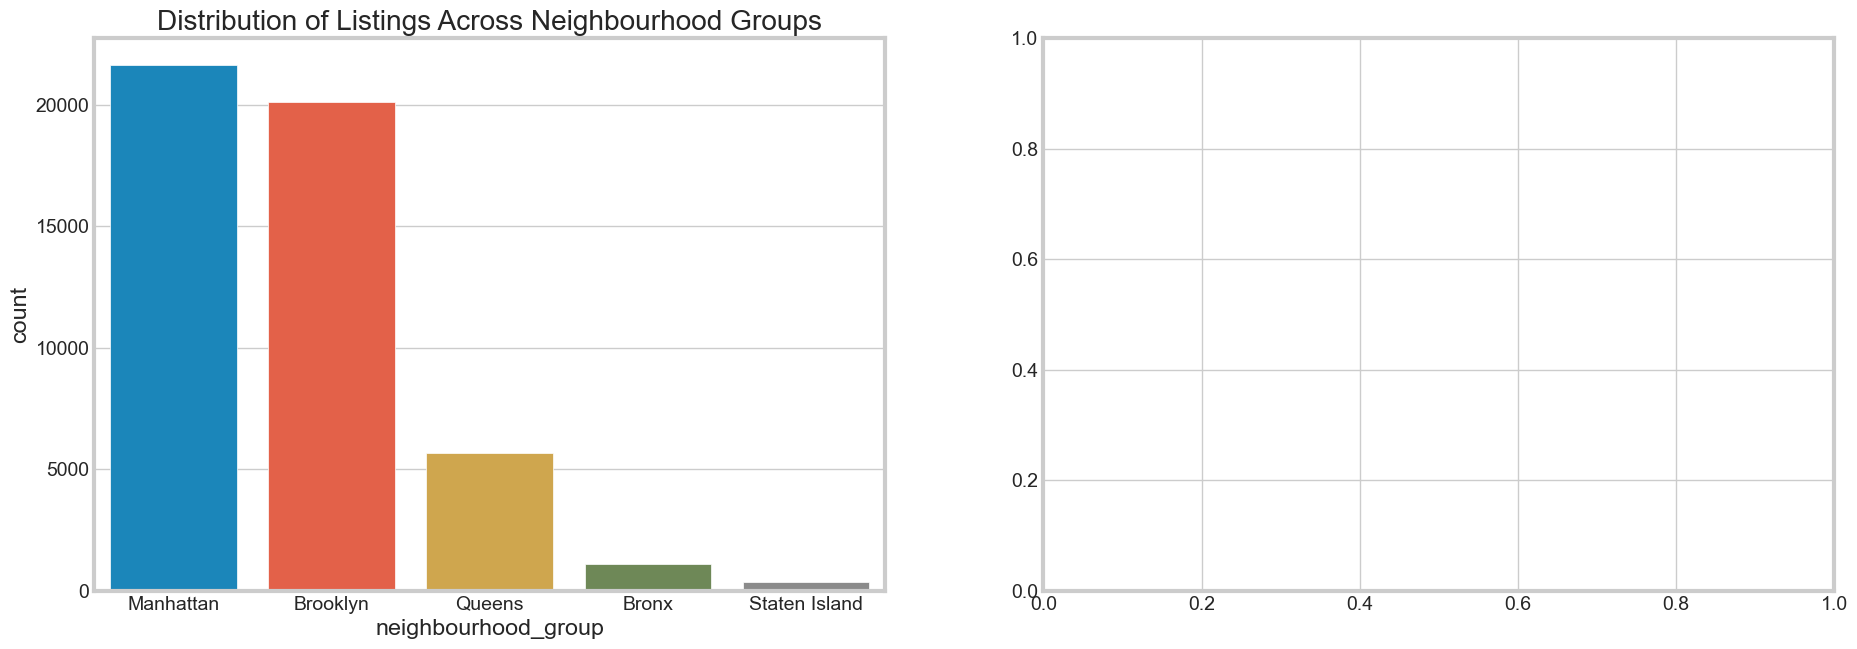

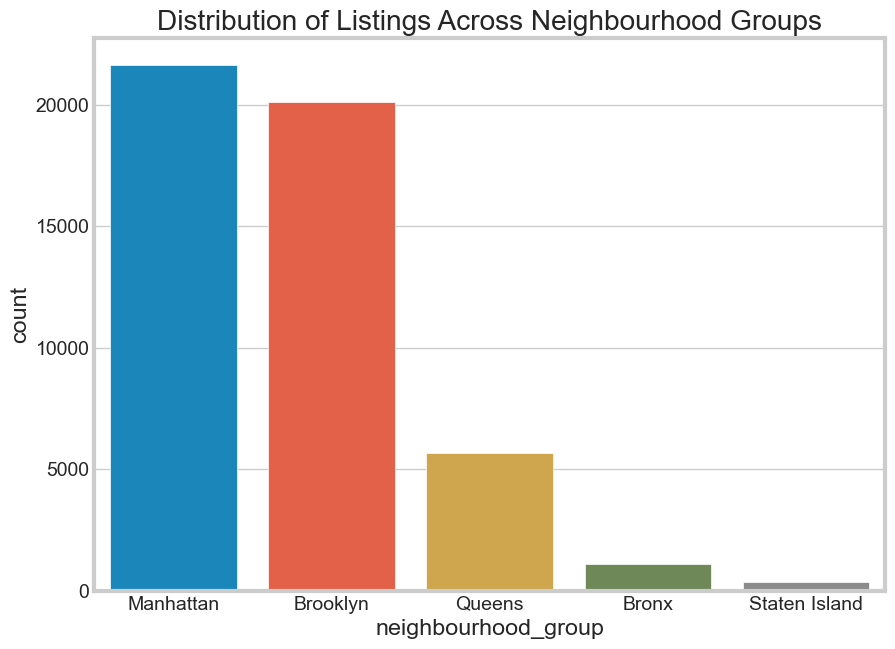

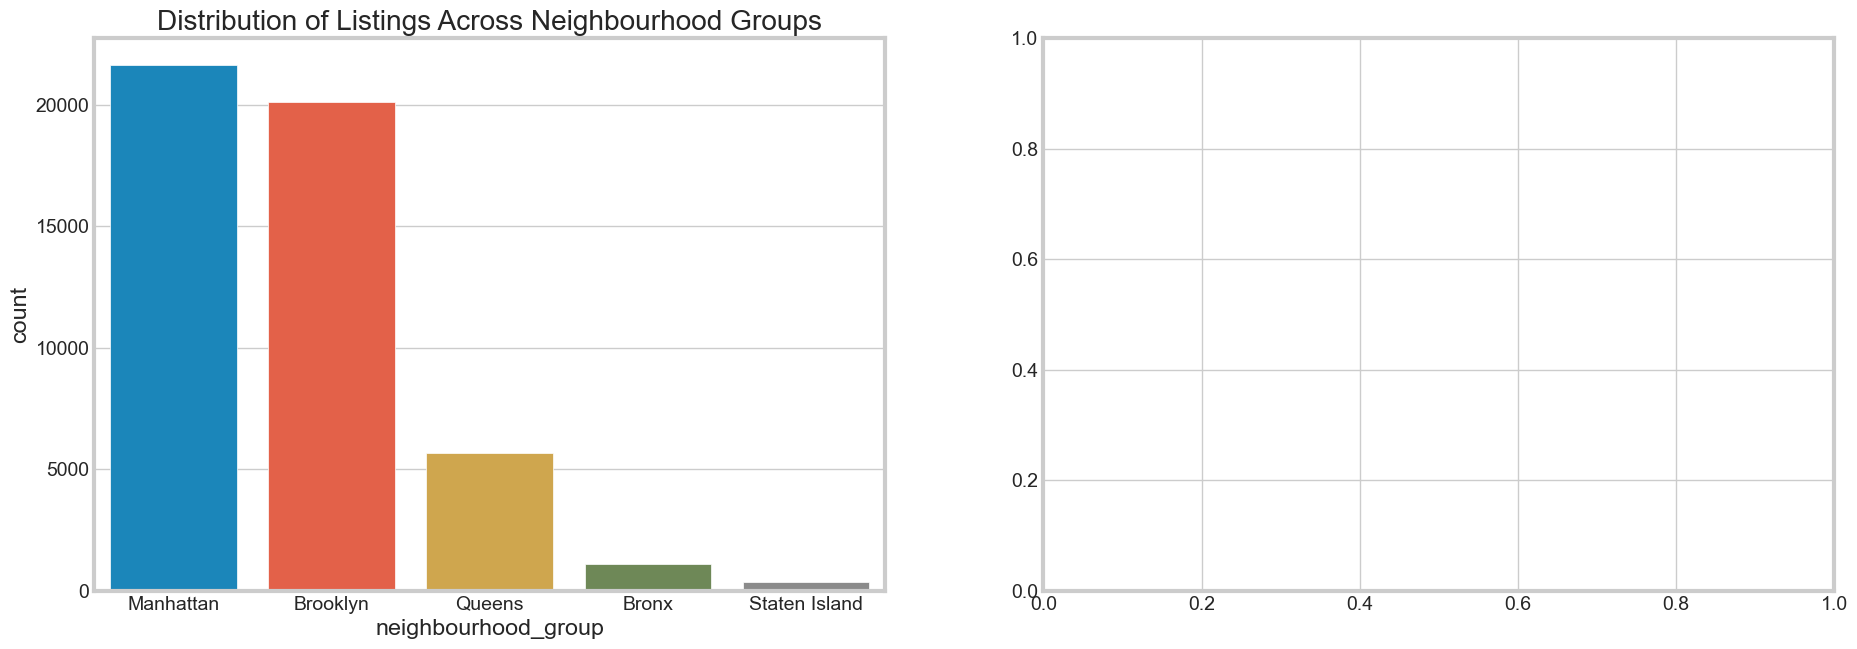

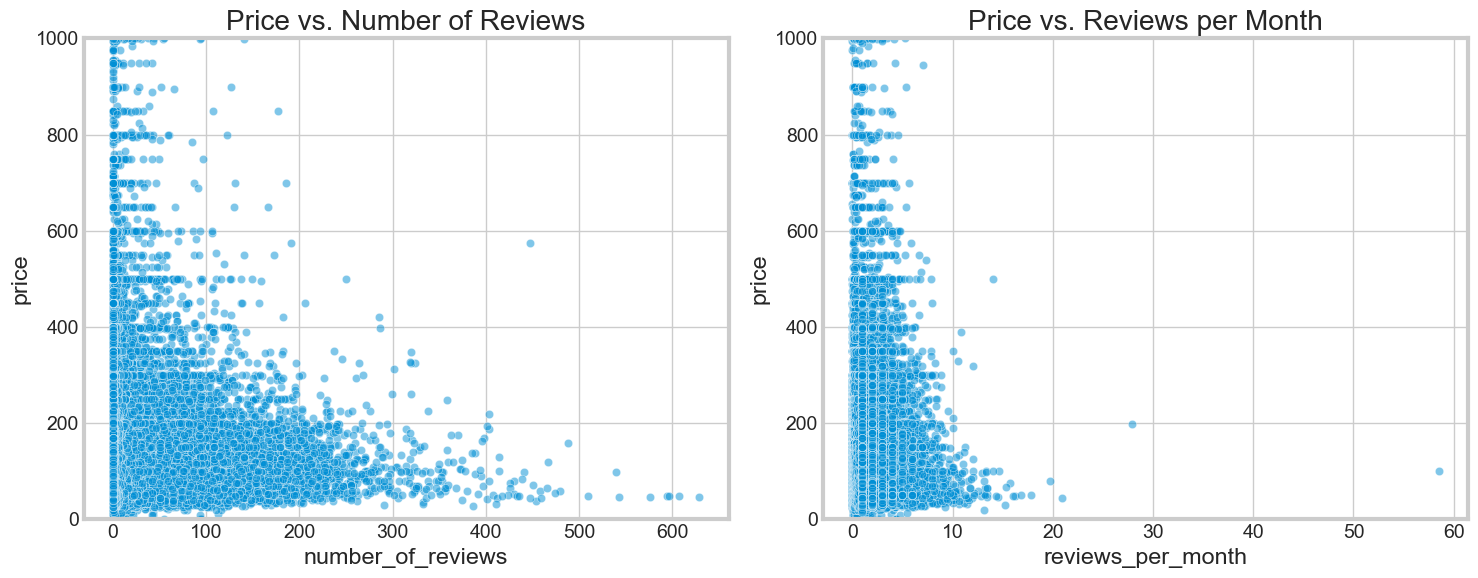

In [38]:
# Set up the plotting
plt.figure(figsize=(15, 6))

# Subplot for Price vs. Number of Reviews
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='number_of_reviews', y='price', alpha=0.5)
plt.title("Price vs. Number of Reviews")
plt.ylim(0, 1000)  # Limiting the y-axis to view the majority of the price distribution

# Subplot for Price vs. Reviews per Month
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='reviews_per_month', y='price', alpha=0.5)
plt.title("Price vs. Reviews per Month")
plt.ylim(0, 1000)  # Limiting the y-axis to view the majority of the price distribution

plt.tight_layout()
plt.show()

In [40]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Drop rows with NaN names
data_cleaned = data.dropna(subset=['name'])

# Tokenize the listing names
words = []
for name in data_cleaned['name']:
    # Convert to lowercase and tokenize
    tokens = re.findall(r'\w+', name.lower())
    # Remove stopwords
    words.extend([word for word in tokens if word not in ENGLISH_STOP_WORDS])

# Get the most common words
word_counts = Counter(words)

# Top 20 most common words
top_words = [item[0] for item in word_counts.most_common(20)]

# Calculate average price for listings containing each of these words
avg_prices = {}
for word in top_words:
    avg_prices[word] = data_cleaned[data_cleaned['name'].str.contains(word, case=False, na=False)]['price'].mean()

avg_prices_sorted = dict(sorted(avg_prices.items(), key=lambda item: item[1], reverse=True))

avg_prices_sorted


{'village': 205.78541136556404,
 '2': 199.61046606704824,
 'east': 173.7783078880407,
 'nyc': 173.44060475161987,
 'apt': 165.73341703285206,
 'park': 165.13816172193137,
 '1': 164.65916845696955,
 'apartment': 154.59571322985957,
 'beautiful': 153.34405649274225,
 'studio': 153.1314133591481,
 'manhattan': 149.78577359535012,
 'bedroom': 149.5722813999766,
 'williamsburg': 144.5832727272727,
 'spacious': 139.315,
 'near': 132.84799669558035,
 'brooklyn': 125.62836710369487,
 'sunny': 117.63498849062809,
 'room': 111.79876991010882,
 'private': 105.38458384583846,
 'cozy': 104.75503815300333}

In [41]:
from nltk.util import ngrams

# Function to extract bigrams and trigrams from a given text
def extract_ngrams(text, n):
    tokens = [token for token in text.lower().split(" ") if token != "" and token not in ENGLISH_STOP_WORDS]
    return list(ngrams(tokens, n))

bigrams = []
trigrams = []

for name in data_cleaned['name']:
    bigrams.extend(extract_ngrams(name, 2))
    trigrams.extend(extract_ngrams(name, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Top 20 bigrams and trigrams
top_bigrams = [item[0] for item in bigram_counts.most_common(20)]
top_trigrams = [item[0] for item in trigram_counts.most_common(20)]

avg_prices_bigrams = {}
avg_prices_trigrams = {}

for bigram in top_bigrams:
    pattern = " ".join(bigram)
    avg_prices_bigrams[pattern] = data_cleaned[data_cleaned['name'].str.contains(pattern, case=False, na=False, regex=False)]['price'].mean()

for trigram in top_trigrams:
    pattern = " ".join(trigram)
    avg_prices_trigrams[pattern] = data_cleaned[data_cleaned['name'].str.contains(pattern, case=False, na=False, regex=False)]['price'].mean()

avg_prices_bigrams_sorted = dict(sorted(avg_prices_bigrams.items(), key=lambda item: item[1], reverse=True))
avg_prices_trigrams_sorted = dict(sorted(avg_prices_trigrams.items(), key=lambda item: item[1], reverse=True))

avg_prices_bigrams_sorted, avg_prices_trigrams_sorted


({'west village': 253.215625,
  'sonder |': 247.5026455026455,
  '2 bedroom': 216.30242272347536,
  'times square': 198.05357142857142,
  'bedroom apt': 184.65335463258785,
  'new york': 183.4703125,
  'central park': 181.4738393515107,
  'east village': 170.0469696969697,
  'upper east': 169.4113475177305,
  'bedroom apartment': 165.90365448504983,
  '1 bedroom': 161.91091593475534,
  'upper west': 156.90298507462686,
  '1 br': 155.56893203883496,
  'park slope': 154.07803992740472,
  'room near': 90.98307952622673,
  'private bedroom': 87.66113989637306,
  'private room': 77.33997937435545,
  'spacious room': 75.05037783375315,
  'cozy room': 69.10208816705337,
  'sunny room': 68.90291262135922},
 {'heart east village': 340.0,
  'sonder | stock': 285.5886075949367,
  '| stock exchange': 285.5886075949367,
  'stock exchange |': 285.5886075949367,
  'new york city': 231.38823529411764,
  '1 bedroom apt': 202.53070175438597,
  '2 bedroom apartment': 191.79326923076923,
  'home away home

In [59]:
# Calculate correlation matrix for the dataset
correlation_matrix = data.corr()

# Extract correlations with 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

price_correlation


price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
host_id                           0.015309
id                                0.010619
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64

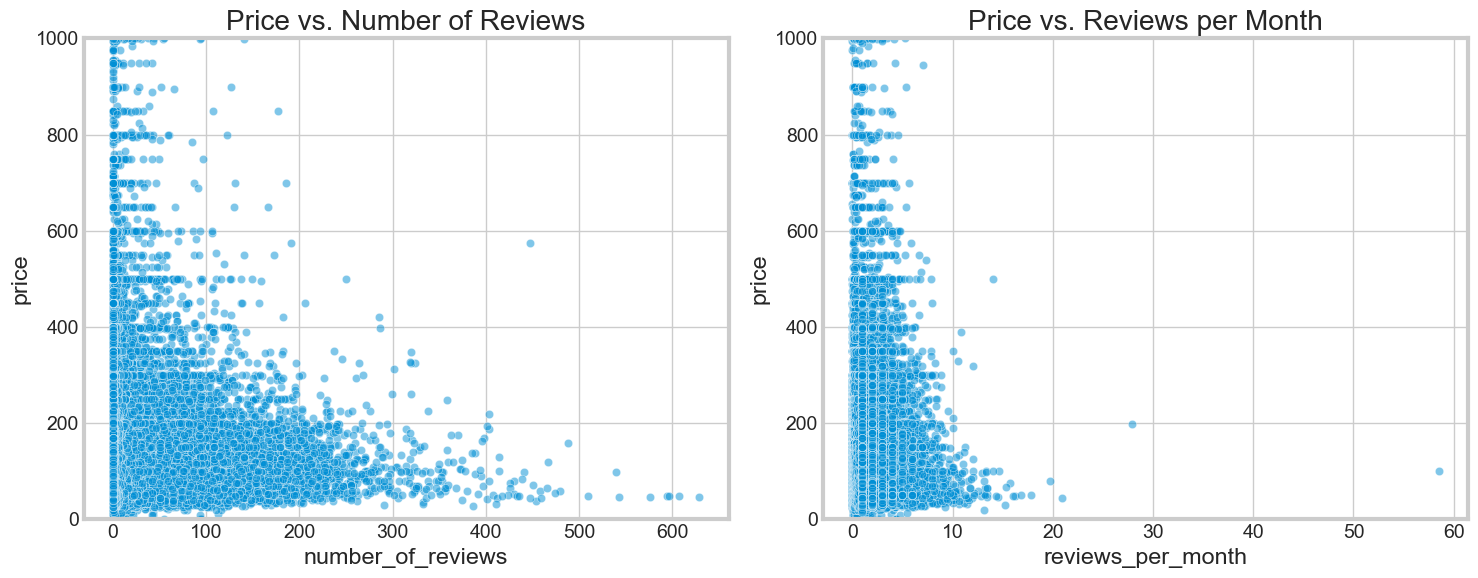

In [60]:
plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='number_of_reviews', y='price', alpha=0.5)
plt.title("Price vs. Number of Reviews")
plt.ylim(0, 1000)  

# Subplot for Price vs. Reviews per Month
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='reviews_per_month', y='price', alpha=0.5)
plt.title("Price vs. Reviews per Month")
plt.ylim(0, 1000)  

plt.tight_layout()
plt.show()


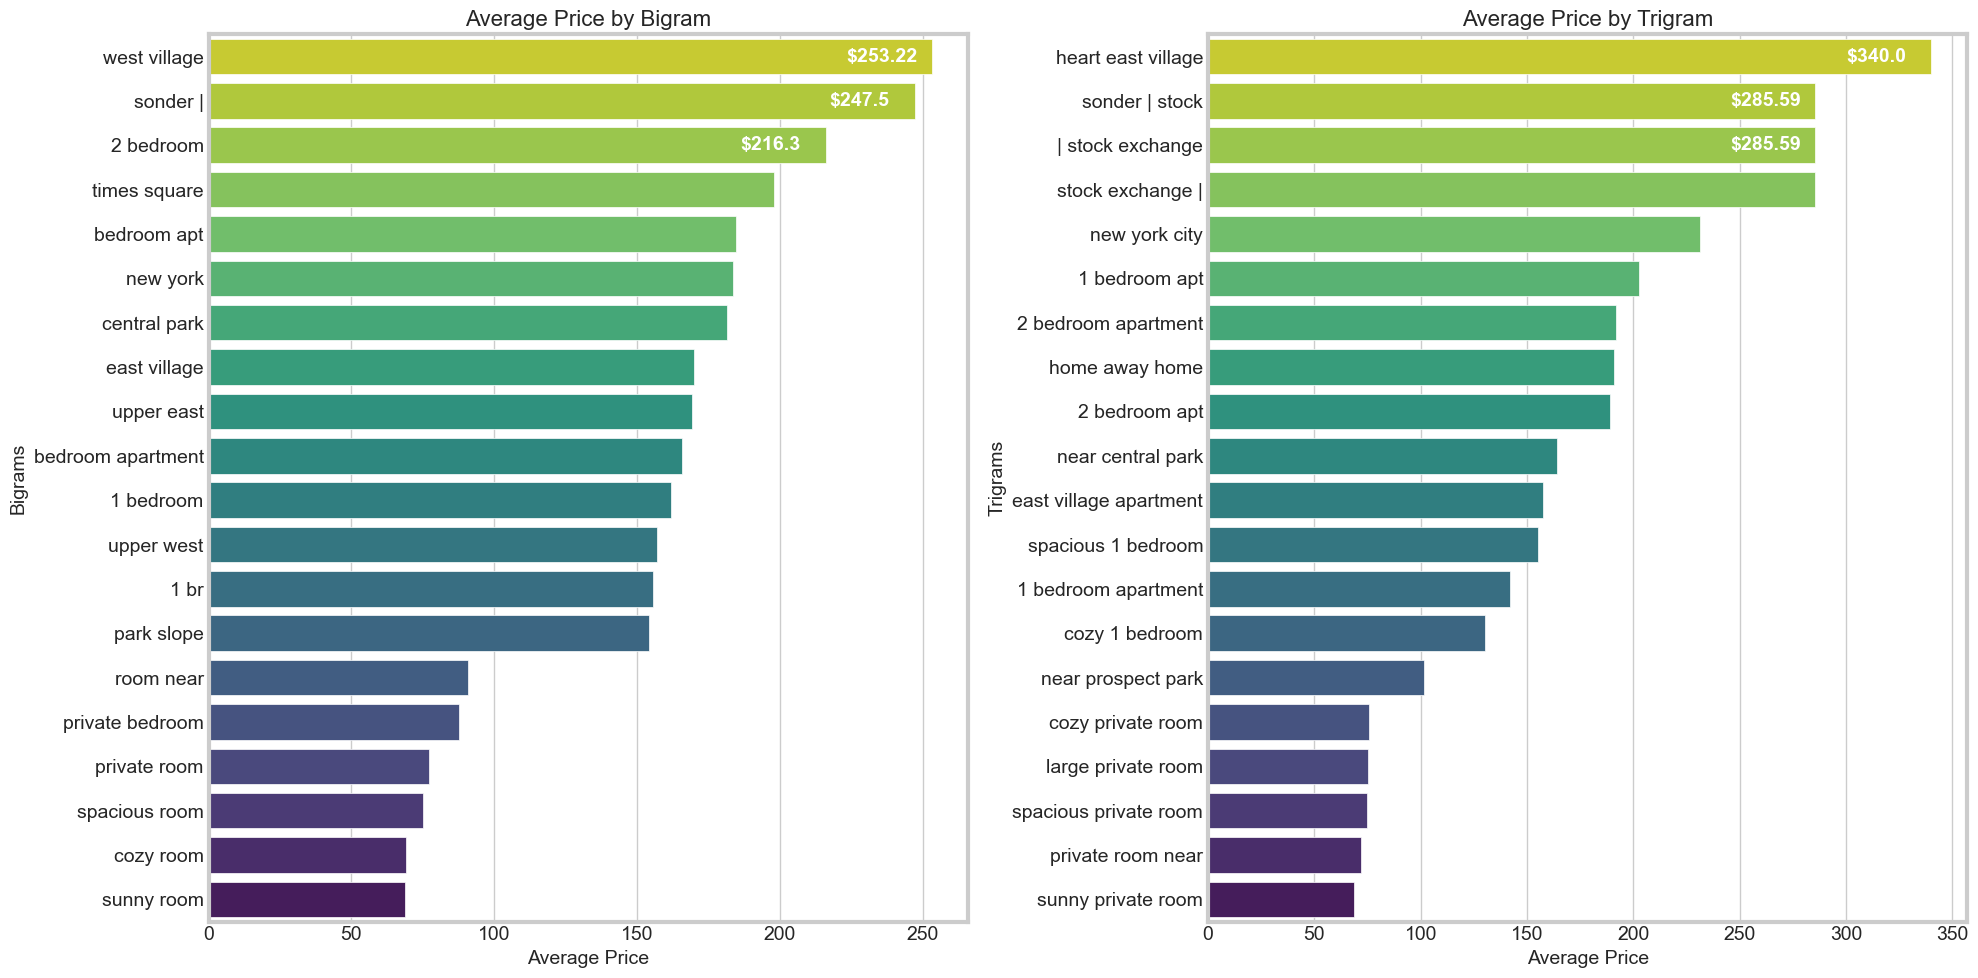

In [64]:
plt.figure(figsize=(20, 10))


plt.subplot(1, 2, 1)
bigram_colors = sns.color_palette("viridis_r", len(avg_prices_bigrams_sorted))
sns.barplot(x=list(avg_prices_bigrams_sorted.values()), y=list(avg_prices_bigrams_sorted.keys()), palette=bigram_colors)
plt.title('Average Price by Bigram', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Bigrams', fontsize=14)


for index, value in enumerate(list(avg_prices_bigrams_sorted.values())[:3]):
    plt.text(value-30, index, f"${round(value, 2)}", va="center", color="white", fontweight="bold")

plt.subplot(1, 2, 2)
trigram_colors = sns.color_palette("viridis_r", len(avg_prices_trigrams_sorted))
sns.barplot(x=list(avg_prices_trigrams_sorted.values()), y=list(avg_prices_trigrams_sorted.keys()), palette=trigram_colors)
plt.title('Average Price by Trigram', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Trigrams', fontsize=14)


for index, value in enumerate(list(avg_prices_trigrams_sorted.values())[:3]):
    plt.text(value-40, index, f"${round(value, 2)}", va="center", color="white", fontweight="bold")

plt.tight_layout()
plt.show()


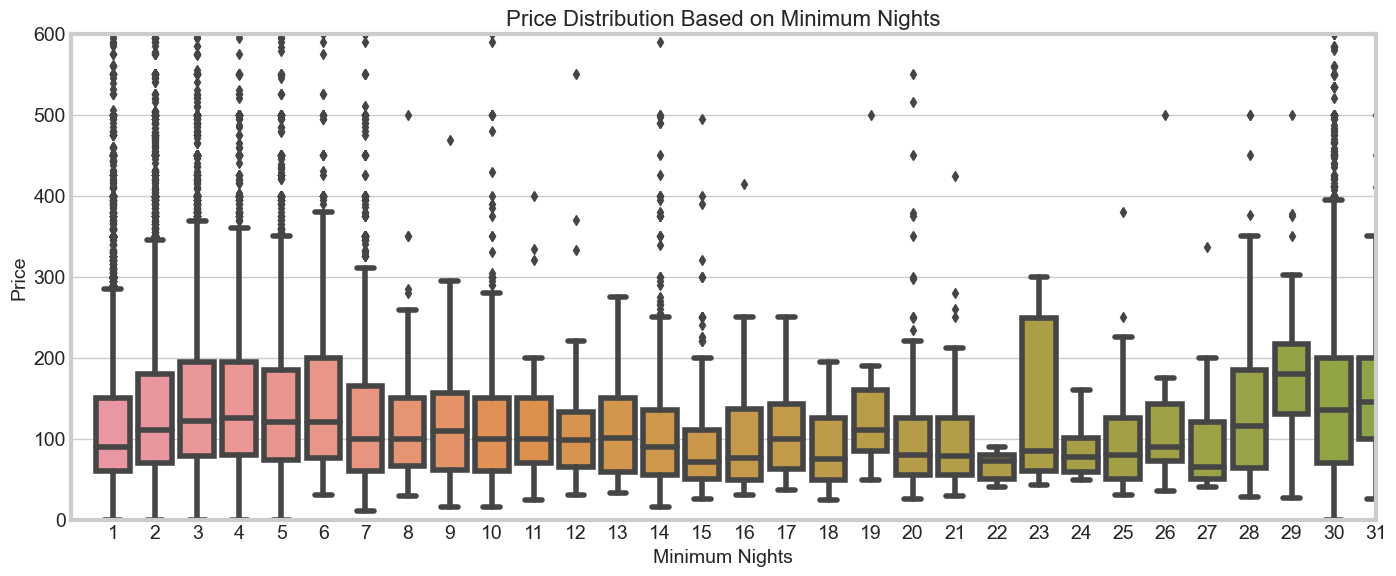

In [65]:
plt.figure(figsize=(15, 6))


sns.boxplot(data=data, x='minimum_nights', y='price')
plt.title('Price Distribution Based on Minimum Nights', fontsize=16)
plt.xlabel('Minimum Nights', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ylim(0, 600)  
plt.xlim(-1, 30)  

plt.show()


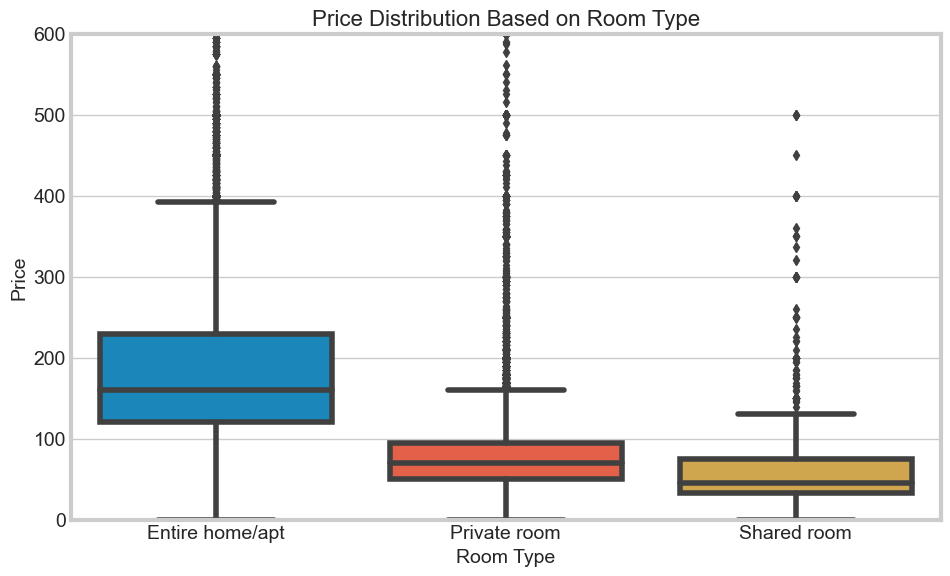

In [66]:
#Price vs Room analysis 
plt.figure(figsize=(10, 6))

sns.boxplot(data=data, x='room_type', y='price', order=['Entire home/apt', 'Private room', 'Shared room'])
plt.title('Price Distribution Based on Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ylim(0, 600)  

plt.show()
